In [6]:
from sklearn.cluster import spectral_clustering
import config
import osmnx as ox
import networkx as nx
import numpy as np

In [2]:
# load graph
graph_file = f"{config.graph_graphml_path}/donegal_osm_weights_applied.graphml"
G = ox.load_graphml(graph_file)
len(G.edges)

6505

In [3]:
# edge weights are loaded as strings so need to convert to numeric
weight_attributes = nx.get_edge_attributes(G, "weight")

weight_attributes = dict([k, {"weight": float(v)}]
                         for k, v in weight_attributes.items())
nx.set_edge_attributes(G, weight_attributes)
nx.get_edge_attributes(G, "weight")

{(780664835, 818377528, 0): 1.0,
 (780664835, 818371756, 0): 1.0,
 (1908244498, 1514190567, 0): 1.0,
 (1908244498, 1908450447, 0): 26.0,
 (3201138706, 1984055360, 0): 1.0,
 (3201138706, 3201138713, 0): 1.0,
 (3201138713, 3201138706, 0): 13.0,
 (3201138713, 1984054673, 0): 1.0,
 (1417674781, 2039160901, 0): 1.0,
 (1417674781, 1417674837, 0): 1.0,
 (1417674781, 258670217, 0): 1.0,
 (3151921209, 33246812, 0): 1.0,
 (3151921209, 33246802, 0): 1.0,
 (911999040, 1435301486, 0): 1.0,
 (911999040, 1918824766, 0): 1.0,
 (821231682, 821216048, 0): 1.0,
 (821231682, 2907229653, 0): 20.0,
 (1908244553, 1908141366, 0): 1.0,
 (1908244553, 1908450663, 0): 1.0,
 (1417674837, 1417674841, 0): 1.0,
 (1417674837, 1417674781, 0): 1.0,
 (1417674837, 1556358443, 0): 1.0,
 (1417674841, 2001839630, 0): 1.0,
 (1417674841, 1417674837, 0): 1.0,
 (378372206, 1886618156, 0): 11.0,
 (378372206, 1904039983, 0): 1.0,
 (378372230, 1886617946, 0): 1.0,
 (378372230, 1886618156, 0): 1.0,
 (2417655943, 2417656005, 0): 1.0,

In [26]:
# get the weighted adjacency matrix
A = nx.to_numpy_array(G, weight="weight")
A

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0., 240.],
       [  0.,   0.,   0., ...,   0., 235.,   0.]])

In [33]:
%%time
# perform spectral clustering using the adjacency matrix
n_clust = 23 # same number as locallink Donegal bus routes
sc = spectral_clustering(A, n_clusters=n_clust)#,
                          # eigen_solver="amg",
                          # assign_labels="discretize") #, eigen_solver='arpack')
# installed pyamg

/home/danny/College/donegal-bus-routes/venv1/lib/python3.8/site-packages/sklearn/utils/validation.py:73: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(**kwargs)
/home/danny/College/donegal-bus-routes/venv1/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


CPU times: user 13min 41s, sys: 10min 21s, total: 24min 2s
Wall time: 7min 47s


In [7]:
test = np.load("/home/danny/College/donegal-bus-routes/gnn/helpers/communities.npy")

In [11]:
for node in G.nodes:
    print(node)

780664835
1908244498
3201138706
3201138713
1417674781
3151921209
911999040
821231682
1908244553
1417674837
1417674841
378372206
378372230
2417655943
1920073869
911999147
2417655996
821231810
2417656005
467796168
798326984
911999189
2114650326
1917681883
3063087326
1887535328
794919140
5187010788
1417674995
2114650363
1887535358
821231871
780665113
2411894191
1329135900
1557332267
1881571642
798327100
4317151555
1920074063
1417675093
1886617946
794919259
2139652452
2417656170
1899004273
1369506177
3153658243
851509645
1417675151
1887535530
1887535531
1899004332
1417675190
1984692665
3749413314
2114650574
1881571809
2114650603
1881571822
1881571824
795640302
911999480
1417675273
1984692752
1886618156
1899004456
1920074301
703791686
1908081264
2469986929
1954841212
1890583168
1984692868
1417675407
1890583206
703791787
2360672944
911999678
794919614
794919634
1908081377
1890583276
794919665
1605600002
6988366619
2394555164
815334176
1877345058
1877345078
1908081463
359531333
1954841416
189

In [38]:
nx.set_node_attributes(G, 0, "community")
i = 0
for node in G.nodes:
    G.nodes[node]["community"] = sc[i]
    i += 1
G.nodes(data=True)

NodeDataView({780664835: {'y': 54.972684, 'x': -7.7090562, 'osmid': 780664835, 'community': 19}, 1908244498: {'y': 54.85721, 'x': -7.5405803, 'osmid': 1908244498, 'community': 0}, 3201138706: {'y': 54.6479035, 'x': -8.6183871, 'osmid': 3201138706, 'community': 21}, 3201138713: {'y': 54.6479279, 'x': -8.6214864, 'osmid': 3201138713, 'community': 21}, 1417674781: {'y': 55.2257747, 'x': -7.0858022, 'osmid': 1417674781, 'community': 3}, 3151921209: {'y': 54.6337503, 'x': -8.6474055, 'osmid': 3151921209, 'community': 21}, 911999040: {'y': 54.7766345, 'x': -8.316315, 'osmid': 911999040, 'community': 17}, 821231682: {'y': 54.9665332, 'x': -7.4597948, 'osmid': 821231682, 'community': 14}, 1908244553: {'y': 54.8561017, 'x': -7.635638, 'osmid': 1908244553, 'community': 0}, 1417674837: {'y': 55.2315345, 'x': -7.084004, 'osmid': 1417674837, 'community': 3}, 1417674841: {'y': 55.2313685, 'x': -7.0824707, 'osmid': 1417674841, 'community': 3}, 378372206: {'y': 55.0463267, 'x': -7.7847622, 'osmid': 37

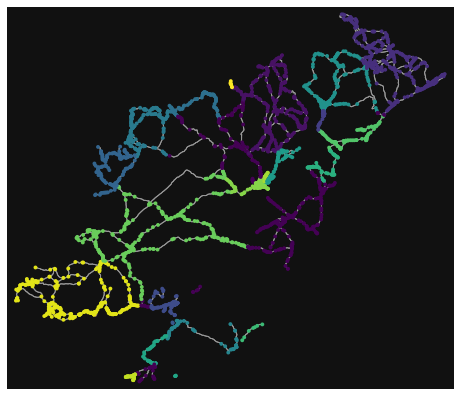

In [39]:
# plot the communities
# get unique groups
from itertools import count

groups = set(nx.get_node_attributes(G, "community").values())
mapping = dict(zip(sorted(groups),count()))
node_colours = [mapping[G.nodes[n]["community"]] for n in G.nodes]
fig, ax = ox.plot_graph(G, node_color=node_colours)

# reduce the number of communities??
# remove disconnected edges